In [ ]:
 ! pip install -q kaggle


In [ ]:
!pip install tensorflow

In [ ]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aryansharma5669","key":"4db5f7b7a07abb7f12a1c8c64cb522dc"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                      25KB  2023-04-13 09:55:16          41396       1199  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                            6KB  2023-05-28 18:26:48           7486        197  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                22KB  2023-05-12 13:06:39           9033        189  1.0              
mohithsairamreddy/salary-data                

In [ ]:
!kaggle datasets download -d sovitrath/diabetic-retinopathy-2015-data-colored-resized

 99% 1.92G/1.94G [00:20<00:00, 66.9MB/s]
100% 1.94G/1.94G [00:20<00:00, 103MB/s] 


In [ ]:
! mkdir data

In [ ]:
! unzip diabetic-retinopathy-2015-data-colored-resized.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/colored_images/colored_images/No_DR/4632_left.png  
  inflating: data/colored_images/colored_images/No_DR/4632_right.png  
  inflating: data/colored_images/colored_images/No_DR/4633_right.png  
  inflating: data/colored_images/colored_images/No_DR/4641_left.png  
  inflating: data/colored_images/colored_images/No_DR/4641_right.png  
  inflating: data/colored_images/colored_images/No_DR/4642_left.png  
  inflating: data/colored_images/colored_images/No_DR/4642_right.png  
  inflating: data/colored_images/colored_images/No_DR/4649_left.png  
  inflating: data/colored_images/colored_images/No_DR/4649_right.png  
  inflating: data/colored_images/colored_images/No_DR/4652_left.png  
  inflating: data/colored_images/colored_images/No_DR/4652_right.png  
  inflating: data/colored_images/colored_images/No_DR/4658_left.png  
  inflating: data/colored_images/colored_images/No_DR/4658_right.png  
  inflating: data/colored_images

code for model

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.xception import Xception

In [ ]:


# Define the path to the directory containing the images
data_dir = '/content/data/colored_images/colored_images'

# Define the output directory to store processed images
output_dir = '/content/data/preprocessed_images'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over the images in the directory
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    output_class_dir = os.path.join(output_dir, class_name)

    # Create the output class directory if it doesn't exist
    if not os.path.exists(output_class_dir):
        os.makedirs(output_class_dir)

    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        output_image_path = os.path.join(output_class_dir, image_name)

        image=cv2.imread(image_path)
        image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # The declaration of CLAHE
        # clipLimit -> Threshold for contrast limiting
        clahe = cv2.createCLAHE(clipLimit = 5)
        final_img = clahe.apply(image_bw) + 30

        # Save the processed image
        cv2.imwrite(output_image_path, final_img)


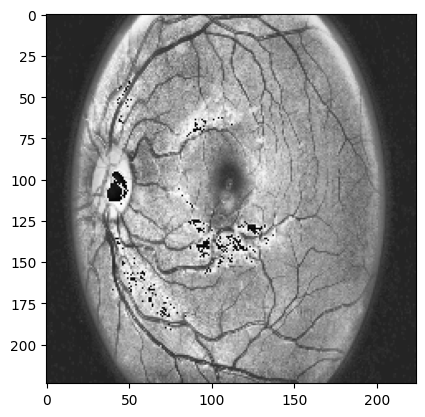

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(cv2.imread('/content/data/preprocessed_images/Mild/10085_left.png'))

In [ ]:
def preprocess_img(image):


    # The initial processing of the image
    # image = cv2.medianBlur(image, 3)
    # img=np.array(image)
    # img = tensorflow.keras.applications.xception.preprocess_input(tensorflow.keras.utils.img_to_array(image))
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # The declaration of CLAHE
    # clipLimit -> Threshold for contrast limiting
    clahe = cv2.createCLAHE(clipLimit = 5)
    final_img = clahe.apply(image_bw) + 30
    return tensorflow.keras.utils.array_to_img(final_img)

In [ ]:
import os
import glob

files = glob.glob('/content/train/Proliferate_DR/*')
for f in files:
    os.remove(f)

In [ ]:
import os
import random
from shutil import copyfile

# Set the paths for the original dataset and the new directories
original_dir = '/content/data/colored_images/colored_images'
train_dir = '/content/train'
test_dir = '/content/test'

# Set the classes of diabetic retinopathy
classes = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

# Create the new directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Set the train-test split ratio
split_ratio = 0.8

# Iterate over the classes and copy the files to the train or test directories
for c in classes:
    # Set the paths for the class folder in the original dataset and the new directories
    class_original_dir = os.path.join(original_dir, c)
    class_train_dir = os.path.join(train_dir, c)
    class_test_dir = os.path.join(test_dir, c)

    # Create the class folders in the new directories if they don't exist
    if not os.path.exists(class_train_dir):
        os.makedirs(class_train_dir)

    if not os.path.exists(class_test_dir):
        os.makedirs(class_test_dir)

    # Get the list of files in the class folder
    files = os.listdir(class_original_dir)

    # Shuffle the files randomly
    random.shuffle(files)

    # Split the files between the train and test directories
    split_index = int(split_ratio * len(files))
    train_files = files[:split_index]
    test_files = files[split_index:]

    # Copy the train files to the train directory
    for f in train_files:
        src = os.path.join(class_original_dir, f)
        dst = os.path.join(class_train_dir, f)
        copyfile(src, dst)

    # Copy the test files to the test directory
    for f in test_files:
        src = os.path.join(class_original_dir, f)
        dst = os.path.join(class_test_dir, f)
        copyfile(src, dst)

In [2]:
batch_size = 32
# number of output classes
nb_classes = 5
# number of epochs to train
nb_epoch = 10
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3
img_rows=224
img_cols=224


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 28099 images belonging to 5 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255

                                 )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 7027 images belonging to 5 classes.


In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

NameError: ignored

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        padding='valid',
                        input_shape=(img_cols, img_rows, 3)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        padding='valid',
                        input_shape=(img_cols, img_rows, 3)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [4]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 74, 74, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 74, 74, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 32)        0         
                                                      

In [ ]:
from tensorflow.keras import optimizers

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:

model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(test_generator)
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/10
878/878 [==============================] - 601s 682ms/step - loss: 0.8942 - accuracy: 0.7341 - val_loss: 0.9024 - val_accuracy: 0.7343
Epoch 2/10
878/878 [==============================] - 603s 686ms/step - loss: 0.8783 - accuracy: 0.7348 - val_loss: 0.8621 - val_accuracy: 0.7347
Epoch 3/10
878/878 [==============================] - 583s 664ms/step - loss: 0.8776 - accuracy: 0.7349 - val_loss: 0.8618 - val_accuracy: 0.7347
Epoch 4/10
878/878 [==============================] - 601s 684ms/step - loss: 0.8724 - accuracy: 0.7348 - val_loss: 0.8611 - val_accuracy: 0.7344
Epoch 5/10
878/878 [==============================] - 599s 682ms/step - loss: 0.8707 - accuracy: 0.7348 - val_loss: 0.8616 - val_accuracy: 0.7350
Epoch 6/10
878/878 [==============================] - 595s 678ms/step - loss: 0.8678 - accuracy: 0.7348 - val_loss: 0.8599 - val_accuracy: 0.7352
Epoch 7/10
878/878 [==============================] - 594s 676ms/step - loss: 0.8664 - accuracy: 0.7348 - val_loss: 0.8773 -